In [1]:
import random
import itertools

In [2]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm

In [3]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [4]:
X, y = make_circles(n_samples=10_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

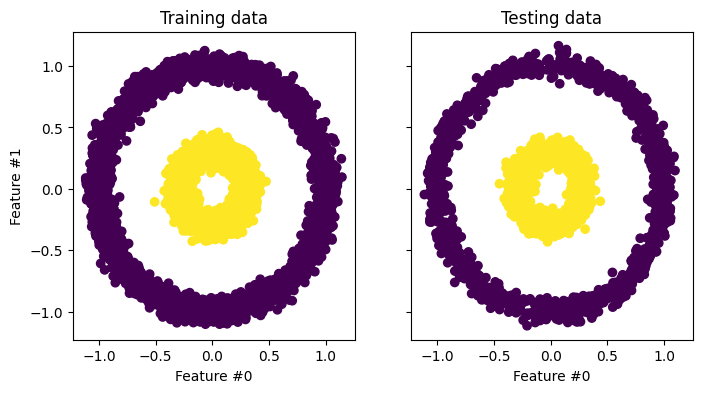

In [5]:
import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

In [6]:
# arquitetura da rede
class MultiLayerNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )

    def forward(self, x):
        x = self.layers(x)
        # x = nn.functional.softmax(x, dim=0)
        return x

In [7]:
# escolhe entre cpu e gpu
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Rodando na {device}")

Rodando na cuda


In [8]:
model = MultiLayerNetwork().to(device)
# model = MultiLayerNetwork()

In [9]:
lossfunc = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)

In [10]:
# Supondo que você já tem os arrays numpy X_train e y_train
# Transforme-os em tensores do PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

In [11]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [12]:
batch_size = 16

# Crie o DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [13]:
def train(model, dataloader, lossfunc, optimizer):
    model.train()
    cumloss = 0.0
    for X, y in dataloader:
        X = X
        y = y.float()
        y = y.unsqueeze(1)
        pred_logits = model(X)
        pred_probs = torch.softmax(pred_logits, dim=1)
        pred = pred_probs.argmax(dim=1)
        # certifique-se de que y esteja no mesmo tipo que pred
        # print(pred_logits)
        # print(y)
        loss = lossfunc(pred_logits, y)

        # zera os gradientes acumulados
        optimizer.zero_grad()
        # computa os gradientes
        loss.backward()
        # anda, de fato, na direção que reduz o erro local
        optimizer.step()

        # loss é um tensor; item pra obter o float
        cumloss += loss.item() 

    return cumloss / len(dataloader)

In [14]:
def test(model, dataloader, lossfunc):
    model.eval()

    cumloss = 0.0
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)

            pred = model(X)
            loss = lossfunc(pred, y.float())
            cumloss += loss.item() 

    return cumloss / len(dataloader)

In [15]:
epochs = 100
for t in tqdm(range(epochs)):
    train_loss = train(model, train_loader, lossfunc, optimizer)
    if t % 10 == 0:
        print(f"Epoch: {t}; Train Loss: {train_loss}")
        # plot_comparinson(f, multimodel, nsamples=40)

test_loss = test(model, test_loader, lossfunc)
print(f"Test Loss: {test_loss}")

  0%|                                                                                          | 0/100 [00:02<?, ?it/s]


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


for x, y in train_loader:
    print(y)

In [ ]:
def get_samples_plot(test_loader=test_loader):
    test_iterable = iter(test_loader)

    # Pegue 100 amostras aleatórias do iterável usando random.sample
    num_samples = 100
    random_samples = random.sample(list(test_iterable), num_samples)
    return random_samples

In [ ]:
random_samples[0]

In [ ]:
def plot_comparinson(test_loader, model, interval=(-10, 10), nsamples=10):
    
    # pegue 100 amostras do teste
    samples = get_samples_plot()
    # predite
    # jogue as predições para a cpu
    # plote
    fig, ax = plt.subplots(figsize=(10, 10))

    ax.grid(True, which='both')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')

    
    model.eval()
    with torch.no_grad():
        for 
        pred = model(torch.tensor(samples).unsqueeze(1).float().to(device))

    ax.plot(samples, list(map(f, samples)), "o", label="ground truth")
    ax.plot(samples, pred.cpu(), label="model")
    plt.legend()
    plt.show()